In [202]:
import pandas as pd
import numpy as np
from scipy.io import arff
from scipy.stats import iqr

import os
import math

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import datetime
import calendar

from numpy import mean
from numpy import std

from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

import joblib

In [203]:
names = ['COMPACTNESS', 'CIRCULARITY', 'DISTANCE', 'RADIUS', 
         'PR.AXIS ASPECT', 'MAX.LENGTH ASPECT', 'SCATTER', 'ELONGATEDNESS', 
         'PR.AXIS RECTANGULARITY', 'MAX.LENGTH', 'SCALED VARIANCE', 'SCALED VARIANCE_minor', 
         'SCALED RADIUS', 'SKEWNESS', 'SKEWNESS_minor', 'KURTOSIS', 'KURTOSIS_major', 'HOLLOWS', 'class']

In [204]:
df_list = []
for file_name in os.listdir():
    if file_name.endswith('.dat'):
        df_list.append(pd.read_csv(file_name, sep = '\s+', header = None, names = names))

In [205]:
vehicle = df_list[0]
for i in range(1, len(df_list)):
    vehicle = pd.concat([vehicle, df_list[i]], ignore_index = True)

In [206]:
print(vehicle.shape)
vehicle.head()

(846, 19)


,COMPACTNESS,CIRCULARITY,DISTANCE,RADIUS,PR.AXIS ASPECT,MAX.LENGTH ASPECT,SCATTER,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH,SCALED VARIANCE,SCALED VARIANCE_minor,SCALED RADIUS,SKEWNESS,SKEWNESS_minor,KURTOSIS,KURTOSIS_major,HOLLOWS,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [207]:
def print_unique(df):
    for col in df.columns:
        print(col, '\n', df[col].sort_values().unique(), '\n')
        
print_unique(vehicle)

COMPACTNESS 
 [ 73  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 119] 

CIRCULARITY 
 [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59] 

DISTANCE 
 [ 40  42  44  47  49  50  51  52  53  54  55  57  58  59  60  61  62  63
  64  65  66  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  98 100 101 102
 103 104 105 106 107 108 109 110 112] 

RADIUS 
 [104 105 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211

In [208]:
def get_snapshot(df):
    n_missing = pd.DataFrame(df.isnull().sum(), columns = ['n_missing'])
    pct_missing = pd.DataFrame(round(df.isnull().sum() / df.shape[0], 2), columns = ['pct_missing'])
    dtype = pd.DataFrame(df.dtypes, columns = ['dtype'])
    n_unique = []
    for col in df.columns:
        n_unique.append(df[col].nunique())    
    return pd.DataFrame(n_unique, index = df.columns, columns = ['n_unique']).join(dtype).join(n_missing).join(pct_missing)

In [209]:
get_snapshot(vehicle)

,n_unique,dtype,n_missing,pct_missing
COMPACTNESS,44,int64,0,0.0
CIRCULARITY,27,int64,0,0.0
DISTANCE,63,int64,0,0.0
RADIUS,134,int64,0,0.0
PR.AXIS ASPECT,37,int64,0,0.0
MAX.LENGTH ASPECT,21,int64,0,0.0
SCATTER,131,int64,0,0.0
ELONGATEDNESS,35,int64,0,0.0
PR.AXIS RECTANGULARITY,13,int64,0,0.0
MAX.LENGTH,66,int64,0,0.0


In [210]:
def plot_single_categorical(df, col):
    plt.figure(figsize = (4, 4))
    x_labels = df[col].value_counts().index
    plt.bar(x = x_labels, height = df[col].value_counts(), color = mcolors.TABLEAU_COLORS)
    sns.despine(top = True)
    
    n_level = df[col].nunique()
    for x_coor in range(n_level):
        plt.annotate(df[col].value_counts().iloc[x_coor], 
                     xy = (x_coor, 
                           df[col].value_counts().iloc[x_coor] + df[col].value_counts().iloc[0]/50))
    
    plt.xticks(np.arange(len(x_labels)), x_labels, rotation = 0)
    plt.grid()
    plt.title(col)
    plt.show()

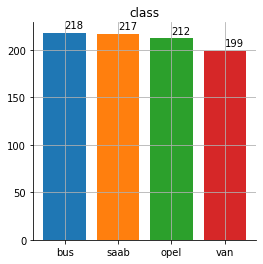

In [211]:
plot_single_categorical(vehicle, 'class')

In [212]:
vehicle_dummi = pd.get_dummies(data = vehicle, columns = ['class'], dtype = int).join(vehicle['class'])
vehicle_dummi.head(2)

,COMPACTNESS,CIRCULARITY,DISTANCE,RADIUS,PR.AXIS ASPECT,MAX.LENGTH ASPECT,SCATTER,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH,...,SKEWNESS,SKEWNESS_minor,KURTOSIS,KURTOSIS_major,HOLLOWS,class_bus,class_opel,class_saab,class_van,class
0,95,48,83,178,72,10,162,42,20,159,...,70,6,16,187,197,0,0,0,1,van
1,91,41,84,141,57,9,149,45,19,143,...,72,9,14,189,199,0,0,0,1,van


In [213]:
targ_col = []
for col in vehicle_dummi.columns:
    if col.startswith('class'):
        targ_col.append(col)
        
targ_col

['class_bus', 'class_opel', 'class_saab', 'class_van', 'class']

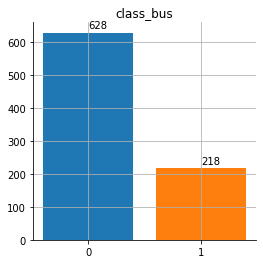

In [214]:
plot_single_categorical(vehicle_dummi, 'class_bus')

In [215]:
features = vehicle_dummi.columns.drop(targ_col)

In [216]:
def scatter_fea_corr_classif_targ(df, features, target):
    corr = df[features].corr()
    n_features = len(features)
    n_sub_figs = (n_features * n_features - n_features) / 2
    if n_sub_figs < 4:
        nrows = 1
        ncols = n_sub_figs
        fig = plt.figure(figsize = (ncols * 3.75, 3))
    else:
        nrows =  math.ceil(n_sub_figs / 4)
        ncols = 4
        fig = plt.figure(figsize = (15, nrows * 3))
    
    m = 1
    for col in features:
        col_index = features.index(col)
        i = 1
        while (col_index + i) <= (n_features - 1):
            corr_val = 0
            ax = fig.add_subplot(nrows, ncols, m)
            ax = sns.scatterplot(x = col, y = features[col_index + i], hue = target, data = df)
            corr_val = round(corr.loc[col, features[col_index + i]], 2)
            plt.title(corr_val)
            
            i += 1
            m += 1
        if col_index == 0:
            break
    plt.tight_layout()
    plt.show()

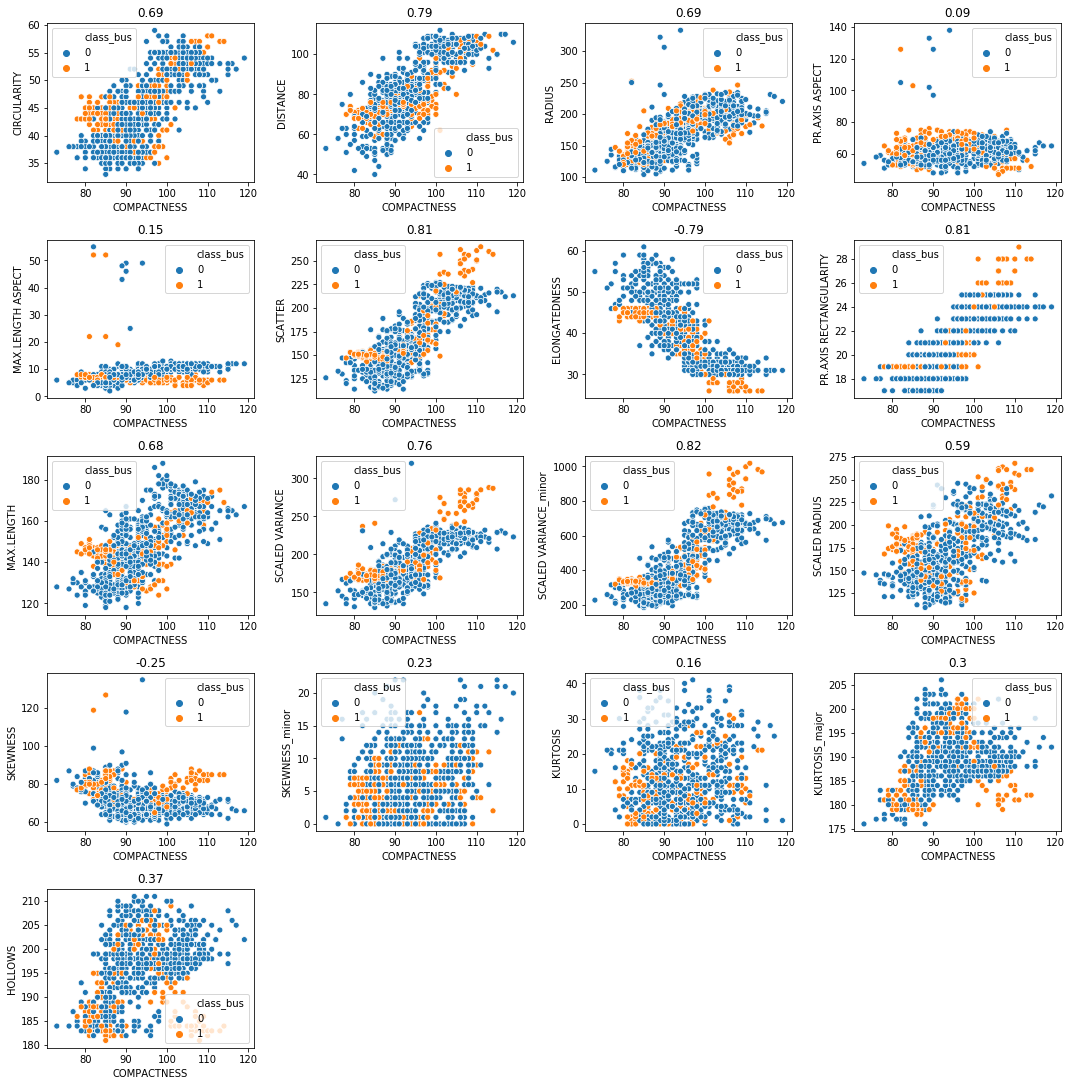

In [217]:
scatter_fea_corr_classif_targ(vehicle_dummi, features.tolist(), 'class_bus')

In [218]:
def feat_significance(X, y, n_feat_data_type, num):
    mi_df = pd.DataFrame(mutual_info_classif(X, y, random_state = 42), index = X.columns, columns = ['score'])
    mi_df = mi_df.sort_values(by = 'score', ascending = False)
    
    def color_cell(s):    
        background = []
        for i in range(len(s.index)):
            if s.index[i] in num:
                background.append('background-color: yellow')
            else:
                background.append('')
        return background
    
    if n_feat_data_type == 1:
        return mi_df
    else:
        return mi_df.style.apply(color_cell, axis = 0)

In [219]:
feat_score = feat_significance(vehicle_dummi[features], vehicle_dummi['class_bus'], 1, '')
feat_score

,score
MAX.LENGTH ASPECT,0.202146
SCALED VARIANCE_minor,0.200564
SCATTER,0.196560
PR.AXIS RECTANGULARITY,0.167919
SCALED VARIANCE,0.163917
ELONGATEDNESS,0.144607
DISTANCE,0.122041
SKEWNESS,0.107722
KURTOSIS_major,0.088157
PR.AXIS ASPECT,0.067577


In [220]:
def get_mean_std(df):
    mean_col = pd.DataFrame(df.mean(), columns = ['mean'])
    std_col = pd.DataFrame(df.std(), columns = ['std'])
    mean_plus_std = mean_col.join(std_col)
    return mean_plus_std

In [221]:
get_mean_std(vehicle_dummi[features])

,mean,std
COMPACTNESS,93.678487,8.234474
CIRCULARITY,44.861702,6.169866
DISTANCE,82.088652,15.771533
RADIUS,168.940898,33.472183
PR.AXIS ASPECT,61.693853,7.888251
MAX.LENGTH ASPECT,8.567376,4.601217
SCATTER,168.839243,33.244978
ELONGATEDNESS,40.933806,7.811560
PR.AXIS RECTANGULARITY,20.582742,2.592138
MAX.LENGTH,147.998818,14.515652


In [222]:
X_scaled = pd.DataFrame(scale(vehicle_dummi[features]), columns = features)
y = vehicle_dummi['class_bus']

In [223]:
lr = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
svc = SVC(random_state = 42)
tree = DecisionTreeClassifier(max_features = 'auto', random_state = 42)

In [224]:
alg_dict = {lr: 'lr', svc: 'svc', knn: 'knn', tree: 'tree'}

In [225]:
def num_feat_perform(algorithm, feat_ordered, X_ordered, y, metric):
    scores = []
    for i in range(1, len(feat_ordered)+1):
        pred_data = X_ordered.iloc[:, 0:i]
        score = mean(cross_val_score(algorithm, pred_data, y, scoring = metric, cv = 5))
        scores.append(score)

    n_features = len(feat_ordered)
    plt.plot(np.arange(n_features), scores, marker = 'x')
    plt.xticks(np.arange(n_features), np.arange(1, n_features + 1))
    for i in range(n_features):
        plt.text(i, scores[i], s = round(scores[i], 2))
    plt.grid()
    plt.xlabel('no. of features')
    plt.ylabel('score')
    
def num_feat_multi_alg(alg_dict, feat_ordered, X_ordered, y, metric):
    n_algorithm = len(alg_dict)
    algorithms = list(alg_dict.keys())
    alg_names = list(alg_dict.values())
    if n_algorithm <= 2:
        nrows = 1
        ncols = n_algorithm
        fig = plt.figure(figsize = (ncols * 6, 4))
    else:
        nrows = math.ceil(n_algorithm / 2)
        ncols = 2
        fig = plt.figure(figsize = (12, nrows * 4))

    for n in range(n_algorithm):
        ax = fig.add_subplot(nrows, ncols, n + 1)
        ax = num_feat_perform(algorithms[n], feat_ordered, X_ordered, y, metric)
        plt.title(f"'{alg_names[n]}' performance by '{metric}'")
        
    plt.tight_layout()
    plt.show()

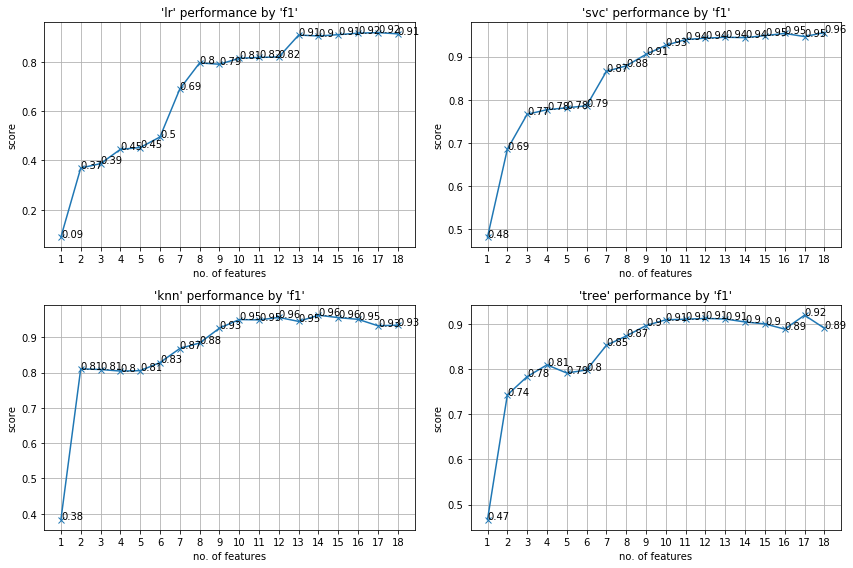

In [226]:
num_feat_multi_alg(alg_dict, feat_score.index, X_scaled[feat_score.index], y, 'f1')

In [227]:
def plot_learning_curve(train_scores, test_scores, train_sizes):
    train_scores = pd.DataFrame(train_scores, index = train_sizes, columns = ['split1', 'split2', 'split3', 'split4', 'split5'])
    train_scores = train_scores.join(pd.Series(train_scores.mean(axis = 1), name = 'mean'))

    test_scores = pd.DataFrame(test_scores, index = train_sizes, columns = ['split1', 'split2', 'split3', 'split4', 'split5'])
    test_scores = test_scores.join(pd.Series(test_scores.mean(axis = 1), name = 'mean'))

    plt.plot(train_scores['mean'], label = 'train_scores')
    plt.plot(test_scores['mean'], label = 'test_scores')
    plt.legend()
    plt.grid()
    plt.xlabel('no. of training samples')
    
def two_metric_graph(algorithm, X, y):
    train_sizes = np.linspace(start = 10, stop = X.shape[0] * 0.8, num = 6, dtype = int)
    fig = plt.figure(figsize = (10, 4))

    for i, metric in enumerate(['f1', 'balanced_accuracy']):
        train_sizes_abs, train_scores, test_scores = learning_curve(algorithm, X, y, train_sizes = train_sizes, 
                                                                    scoring = metric, cv = 5, shuffle = True, 
                                                                    random_state = 42)
        ax = fig.add_subplot(1, 2, i + 1)
        ax = plot_learning_curve(train_scores, test_scores, train_sizes)
        plt.title(f"performance by '{metric}'")

    plt.tight_layout()
    plt.show()

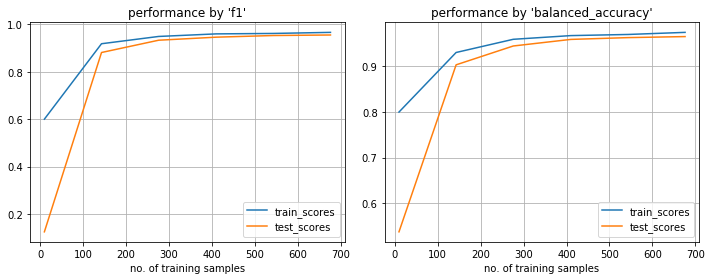

In [228]:
two_metric_graph(svc, X_scaled, y)

In [229]:
svc.fit(X_scaled, y)
joblib.dump(svc, 'svc.joblib')

['svc.joblib']